# Perkenalan

## Data
Dataset yang digunakan adalah "Rain in Australia." Dalam konteks ini, kita mencoba untuk memprediksi hujan pada hari berikutnya di Australia dengan melatih model klasifikasi menggunakan variabel target "RainTomorrow." Dataset ini berisi informasi cuaca dan pengamatan hujan di berbagai lokasi di Australia, yang digunakan untuk mengembangkan model prediksi cuaca. Dataset ini didapat dari sumber : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## Objective
Objective yang ingin dicapat pada analisis ini, yaitu:
1. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi




## Import Libraries

In [160]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline

## Data Loading

In [161]:
# Membaca file CSV 'weatherAUS.csv' menggunakan pandas
df = pd.read_csv('dataset/weatherAUS.csv')

# Menampilkan informasi mengenai struktur DataFrame (df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Exploratory data analysis

In [162]:
# Menampilkan beberapa baris pertama dari DataFrame (df)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [163]:
# Menampilkan daftar nama kolom dalam DataFrame (df)
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [164]:
# Menampilkan dimensi (jumlah baris dan kolom)
df.shape

(145460, 23)

In [165]:
# Menghitung jumlah nilai yang hilang dalam setiap kolom DataFrame
missing_count = df.isna().sum()

missing_count

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [166]:
# Memilih kolom-kolom kategorikal dalam DataFrame
categorical = [var for var in df.columns if df[var].dtype=='O']

# Menampilkan daftar kolom kategorikal
categorical


['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [167]:
# Mengidentifikasi kolom jenis numerical
numerical = [var for var in df.columns if pd.api.types.is_numeric_dtype(df[var])]

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

 Memeriksa apakah masih terdapat nilai yang hilang

In [168]:
missing_count = df.isna().sum()
missing_count

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Data Preprocessing

## Data Cleaning

**Fill nan with mode for categorial features**

In [169]:
categorial_df = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

for column in categorial_df:
    df[column] = df[column].fillna(df[column].mode()[0])

**Fill nan with mean for numerical features**

In [170]:
numerical_df = df.select_dtypes(include=['number'])

for column in numerical_df:
    df[column] = df[column].fillna(df[column].mean())

Mengecek kembali jumlah nilai yang hilang 

In [171]:
missing_count = df.isna().sum()
missing_count

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Data Exploration

In [172]:
def plot_corr(df, size=15):
    corr = df.corr()
    plt.figure(figsize=(size, size))
    plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

<Figure size 1500x1500 with 0 Axes>

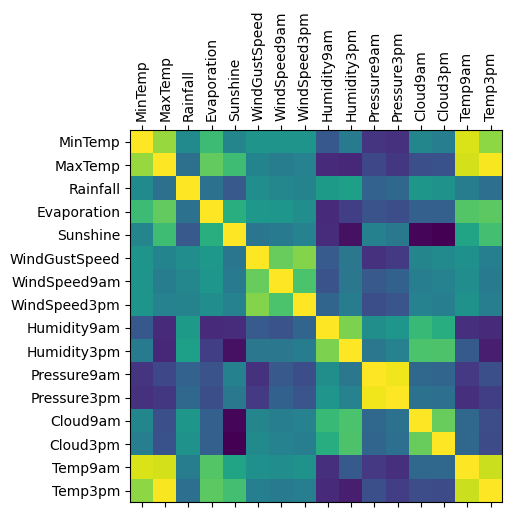

In [173]:
# Menampilkan matriks korelasi untuk kolom numerik dalam DataFrame
plot_corr(numerical_df)

In [174]:
# Menghitung matriks korelasi untuk kolom numerik dalam DataFrame
numerical_df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


pada kolom Temp9pm, Temp3pm, Pressure3pm, terdapat kolerasi maka akan di drop

In [175]:
del numerical_df['Temp3pm']
del numerical_df['Temp9am']
del numerical_df['Pressure3pm']

<Figure size 1500x1500 with 0 Axes>

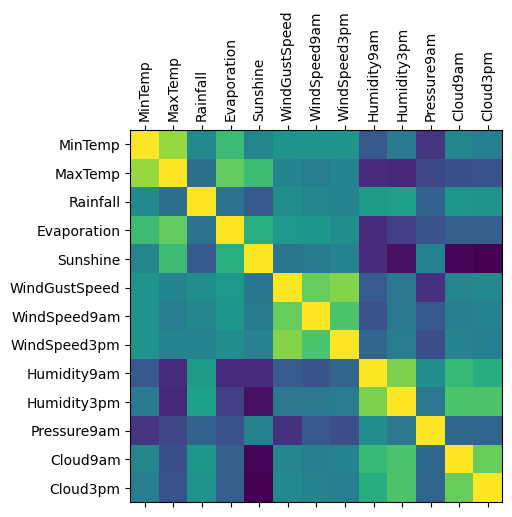

In [176]:
df.select_dtypes(include=['number'])
plot_corr(numerical_df)

In [177]:
# Menampilkan nilai unik dalam kolom 'Location'
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

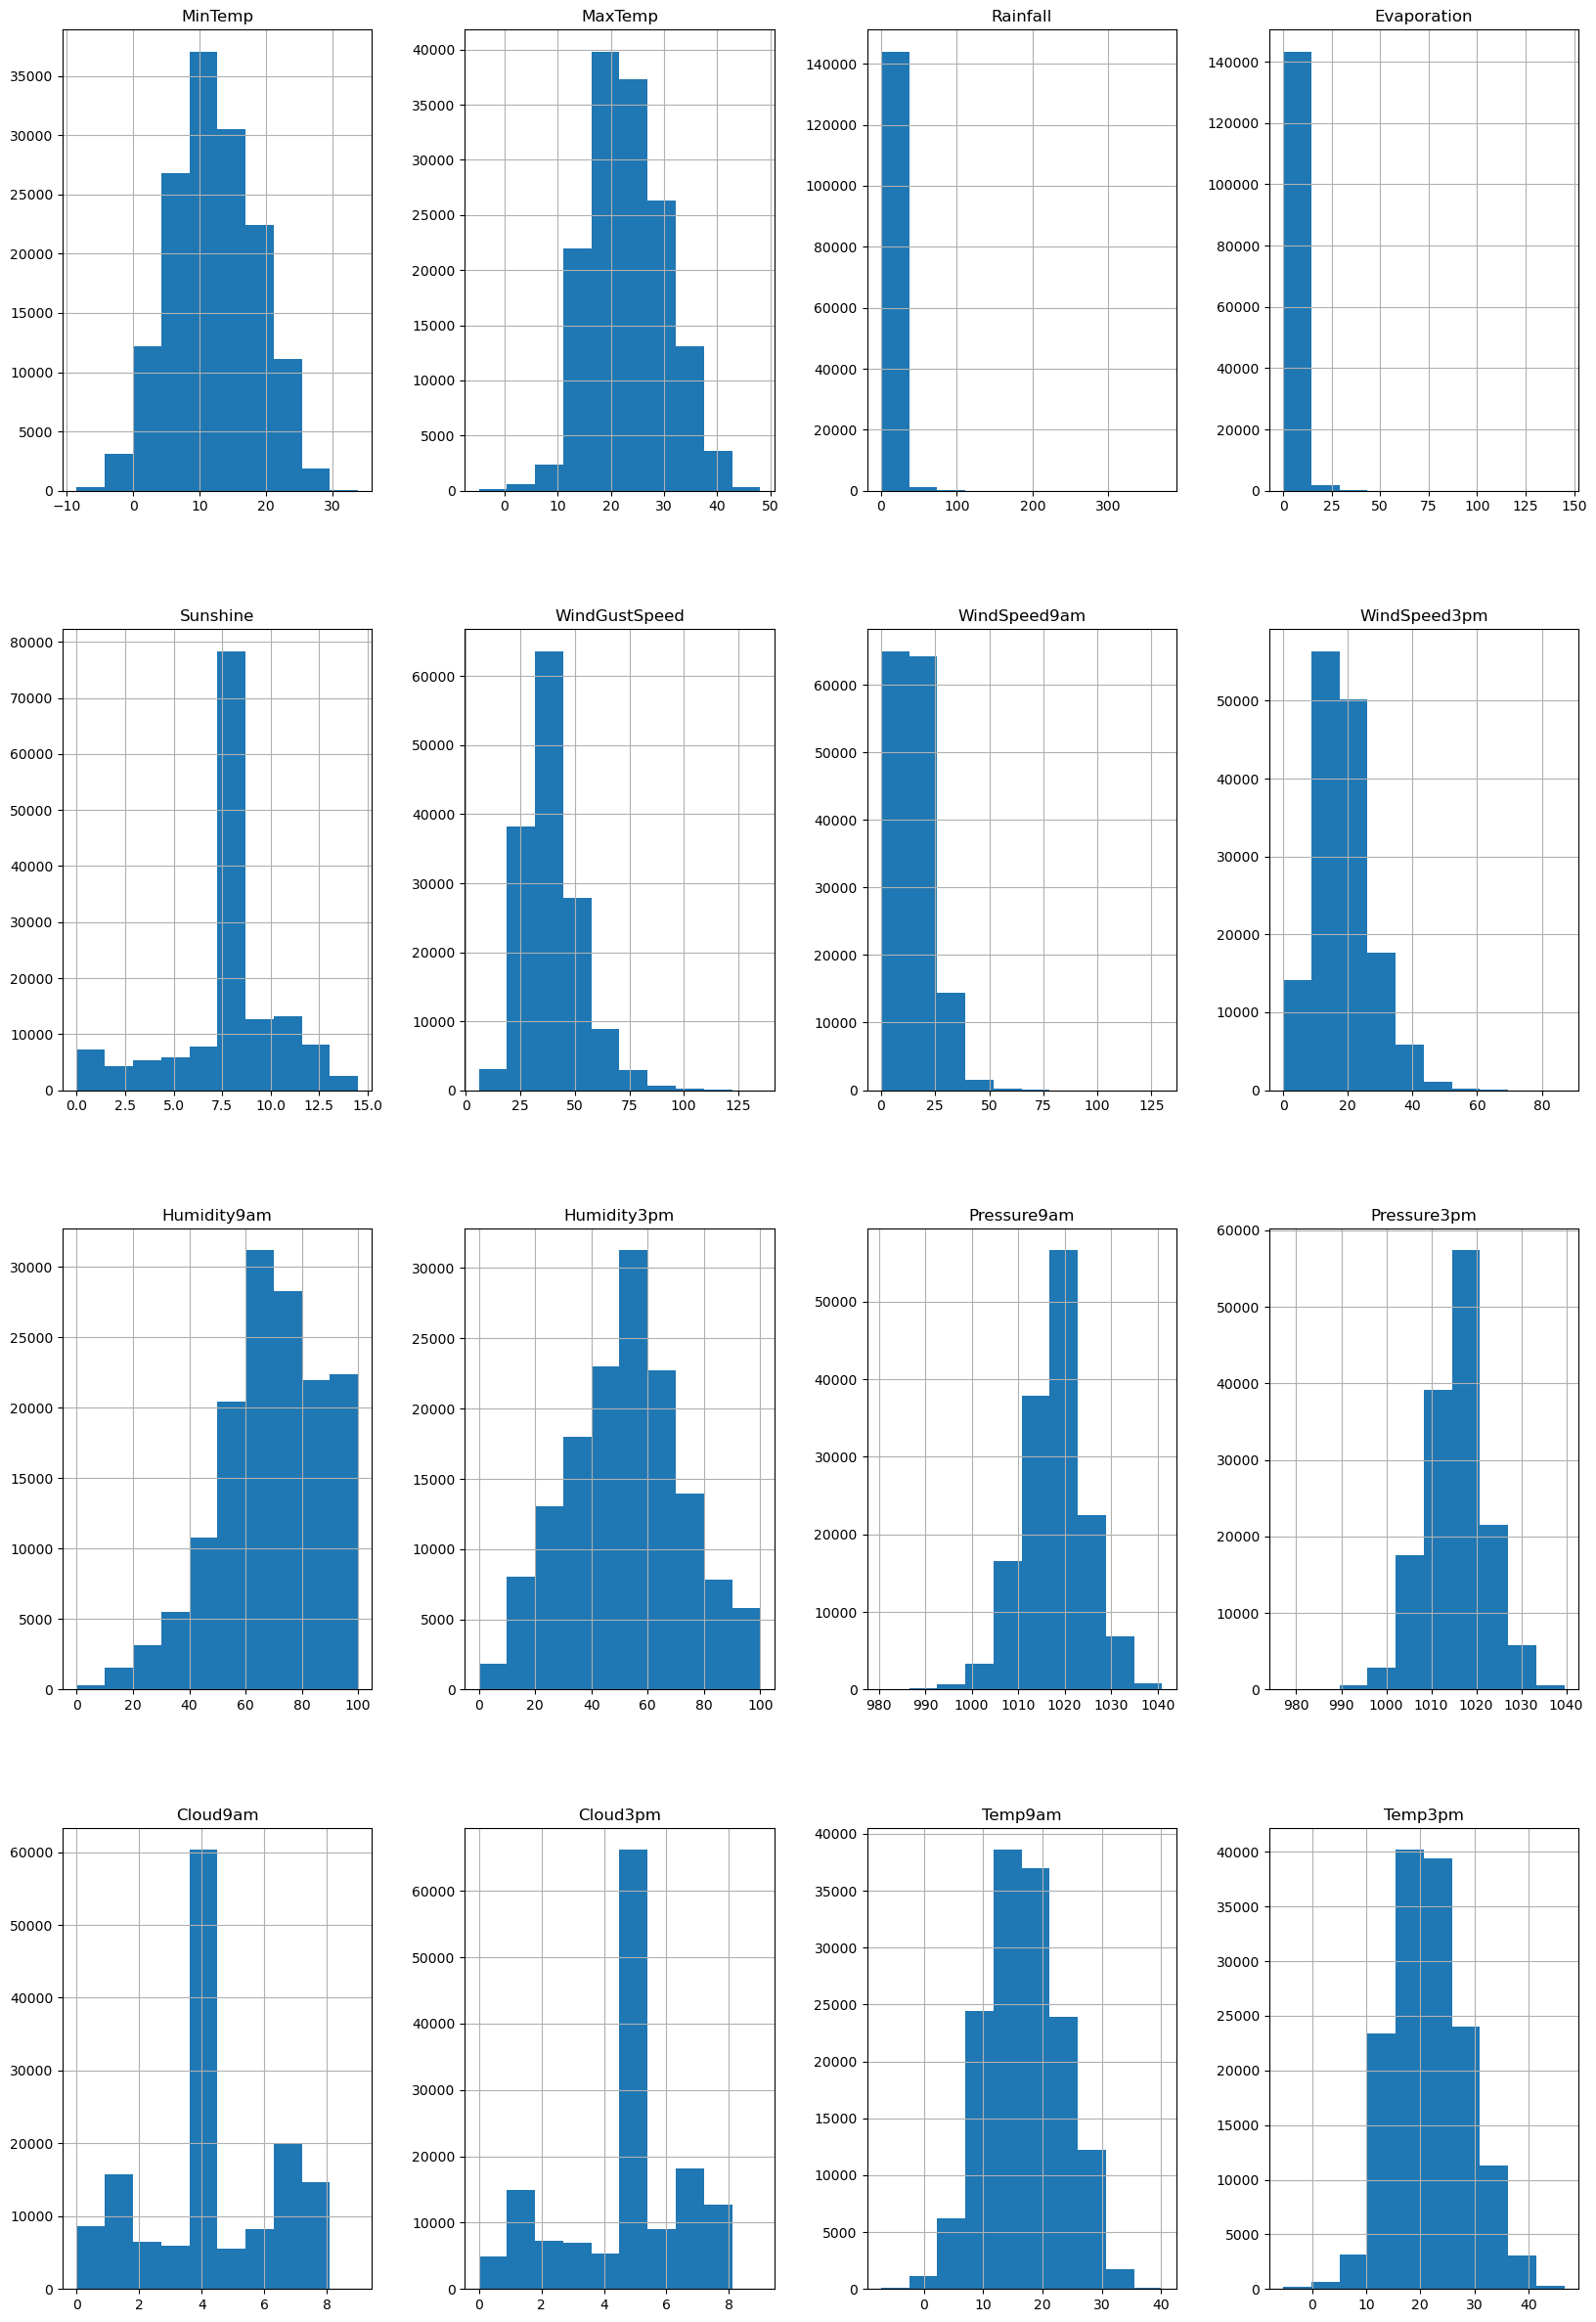

In [178]:
# Menampilkan histogram untuk setiap kolom dalam DataFrame
df.hist(figsize=(20, 30))

<Figure size 1200x600 with 0 Axes>

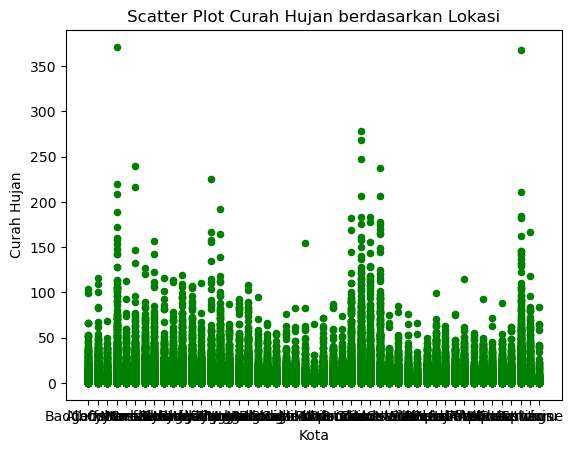

In [179]:
# Membuat ukuran scatter plot
plt.figure(figsize=(12, 6))

# Membuat scatter plot
df.plot(kind='scatter', x='Location', y='Rainfall', marker='o', color='green')

plt.title('Scatter Plot Curah Hujan berdasarkan Lokasi')
plt.ylabel('Curah Hujan')
plt.xlabel('Kota')

plt.show()


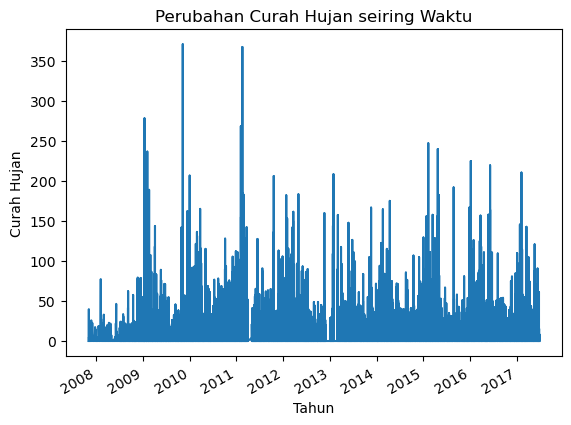

In [180]:
# Membuat line plot
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Rainfall'].plot(kind='line')

plt.title('Perubahan Curah Hujan seiring Waktu')
plt.ylabel('Curah Hujan')
plt.xlabel('Tahun')

plt.show()

## Convert categorial and binary features to float

Filter hanya lokasi di Canberra untuk uji model

In [181]:
# Membuat DataFrame baru (Canberra_df) yang hanya berisi data dari lokasi 'Canberra'
Canberra_df = df.loc[df['Location']=='Canberra'].copy()

# Menampilkan dimensi (jumlah baris dan kolom) dari Canberra_df
Canberra_df.shape

(3436, 22)

In [182]:
# Import library LabelEncoder
le = preprocessing.LabelEncoder()

# Kolom dengan nilai biner
binary = ['RainToday', 'RainTomorrow']

# Kolom dengan nilai kategorikal
categorical = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Kolom dengan nilai numerik
numerical = df.select_dtypes(include=['number']).columns

# Mapping hasil 'Yes' ke 1 dan 'No' ke 0
result = {'Yes': 1, 'No': 0}

# Menghapus baris yang memiliki nilai hilang dalam kolom biner
Canberra_df.dropna(subset=binary, inplace=True)

# Mengganti nilai 'Yes' dan 'No' dengan 1 dan 0 dalam kolom biner
for column in binary:
    Canberra_df.loc[:, column] = Canberra_df[column].replace(result)

# Mengisi nilai yang hilang dalam kolom kategorikal dengan modus
for col in categorical:
    mode_value = Canberra_df[col].mode()[0]
    Canberra_df[col].fillna(mode_value, inplace=True)
    Canberra_df[col] = le.fit_transform(Canberra_df[col]).astype(float)

# Mengonversi tipe data kolom biner menjadi float
Canberra_df[binary] = Canberra_df[binary].astype(float)

# Menampilkan beberapa baris pertama dari DataFrame yang telah diubah
Canberra_df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,7.0,30.0,12.0,7.0,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0.0,1.0
2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,1.0,39.0,0.0,13.0,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1.0,1.0
2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,7.0,85.0,3.0,5.0,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1.0,1.0
2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,7.0,54.0,14.0,13.0,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,1.0,1.0
2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,10.0,50.0,10.0,2.0,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1.0,0.0


In [183]:
# Menghitung jumlah observasi
num_obs = len(Canberra_df)

# Menghitung jumlah True occurrences
num_true = len(Canberra_df[Canberra_df['RainTomorrow'] == 1])

# Menghitung jumlah False occurrences
num_false = len(Canberra_df[Canberra_df['RainTomorrow'] == 0])

# Menampilkan hasil prediksi hujan besok (True) dan tidak hujan besok (False)
print('Prediksi hujan besok (True): {0} ({1:2.2f}%)'.format(num_true, (num_true / num_obs) * 100))
print('Prediksi tidak hujan besok (False): {0} ({1:2.2f}%)'.format(num_false, (num_false / num_obs) * 100))


Prediksi hujan besok (True): 629 (18.31%)
Prediksi tidak hujan besok (False): 2807 (81.69%)


# Modelling

## Logistic Regression Execution

In [186]:
# Menggunakan StandardScaler untuk menormalkan data
scaler = StandardScaler()

# Memisahkan variabel dependen (y) dan variabel independen (x)
y = Canberra_df['RainTomorrow']
x = Canberra_df.drop(columns=['RainTomorrow', 'Location'], axis=1)

In [187]:
# Memisahkan data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Menormalisasi data pelatihan menggunakan scaler yang telah disiapkan sebelumnya
x_train = scaler.fit_transform(x_train)


In [188]:
# Membuat model Regresi Logistik dengan parameter tertentu
model = LogisticRegression(solver='liblinear', C=0.7, multi_class='ovr', random_state=42, max_iter=10000)

# Melatih model menggunakan data pelatihan yang telah dinormalisasi
model.fit(x_train, y_train)


LogisticRegression(C=0.7, max_iter=10000, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [189]:
# Menormalisasi data pengujian menggunakan scaler yang telah disiapkan sebelumnya
x_test = scaler.transform(x_test)

In [ ]:
# Memprediksi nilai target (y) menggunakan model pada data pengujian
y_pred = model.predict(x_test)

In [190]:
# Menampilkan akurasi model pada data pelatihan
print("Akurasi pada data pelatihan:", model.score(x_train, y_train))

# Menampilkan akurasi model pada data pengujian
print("Akurasi pada data pengujian:", model.score(x_test, y_test))

Akurasi pada data pelatihan: 0.8715176715176716
Akurasi pada data pengujian: 0.8903976721629486


In [191]:
# Membuat DataFrame untuk Confusion Matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm_df.columns = ['Prediksi 0', 'Prediksi 1']
cm_df = cm_df.rename(index={0: 'Aktual 0', 1: 'Aktual 1'})
cm_df


,Prediksi 0,Prediksi 1
Aktual 0,837,13
Aktual 1,108,73


## SVM

In [192]:
# Menggunakan Support Vector Machine (SVM) dengan kernel linear
from sklearn import svm
from sklearn import metrics

# Membuat objek SVM dengan kernel linear
clf = svm.SVC(kernel='linear')

# Melatih model SVM menggunakan data pelatihan
clf.fit(x_train, y_train)

# Memprediksi nilai target (y) pada data pengujian
y_pred = clf.predict(x_test)


In [193]:
# Menampilkan akurasi model SVM pada data pengujian
print("Akurasi:", metrics.accuracy_score(y_test, y_pred))

Akurasi: 0.8826382153249273


# Analysis


## Kesimpulan 

## 1. Support Vector Machine (SVM):
Dengan menggunakan SVM dan kernel linear, model mencapai akurasi sekitar 88.26% pada data pengujian. Ini menunjukkan kemampuan model untuk memprediksi apakah akan hujan pada hari berikutnya dengan tingkat keakuratan yang baik.

## 2. Regresi Logistik:

Model Regresi Logistik memberikan hasil yang baik dengan akurasi sekitar 89.04% pada data pengujian.

Confusion Matrix menunjukkan model dapat memprediksi dengan benar sebagian besar kasus hujan dan tidak hujan.

Dari observasi, terdapat prediksi bahwa hujan akan terjadi besok (True) sebanyak 18.31%, sedangkan tidak hujan besok (False) sebanyak 81.69%.
